# 1 - Importações e Funções auxiliares

Por favor, pule esta seção e vá para Análise dos histogramas!

In [1]:
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snas
import cv2
import scipy.stats as st
from main import *
%matplotlib inline

In [2]:
def scale(arr):
    """
    Equaliza de um intervalo para 0 a 255.
    """
    return ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255)).astype('uint8')

In [3]:
def scale_to_01_interval(arr):
    """
    Equaliza para o intervalo entre 0 e 1.
    """
    return ((arr - arr.min()) * (1/(arr.max() - arr.min()))).astype('float32')

In [4]:
def read_img(img_path):
    """
    Retorna um numpy array.
    """
    return cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [62]:
def show(img_path, noise='gaussian', sigma=128, scale=1):
    img = read_img(img_path)
    
    if noise == 'exponential':
        dist = 'expon'
    elif noise == 'gaussian':
        dist = 'norm'
    else:
        dist = noise
    
    if noise == 'gaussian':
        noise = np.random.normal(0, sigma/255.0, img.shape)
    elif noise == 'gamma':
        noise = np.random.gamma(shape=0.2, scale=scale, size=img.shape)
    else:
        fn = getattr(np.random, noise)
        noise = fn(scale=scale, size=img.shape)

            
    noisy = img + noise * sigma
    
    plt.figure(figsize=(24,24))
    plots = [
        {'title': 'Original', 'img': img}, 
        {'title': 'Com ruído', 'img': noisy},
        {'title': 'Ruído', 'img': noise}
    ]
        
    fig, axarr = plt.subplots(2,len(plots))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, p in enumerate(plots):
        title = p['title']
        nparr = p['img']
        
        axarr[0,i].set_title(title)
        axarr[0,i].imshow(nparr, cmap='gray')
        
        axarr[1,i].set_title(title)
        
        hist, bin_edges = np.histogram(nparr.flatten(), bins=256, density=False)
        
        axarr[1,i].plot(hist)

# 2 - Análise dos Histogramas

## 2.1 - Ruído Gaussiano

<Figure size 1728x1728 with 0 Axes>

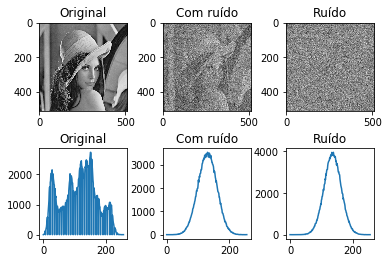

In [63]:
show('images/lena.png', noise='gaussian')

<Figure size 1728x1728 with 0 Axes>

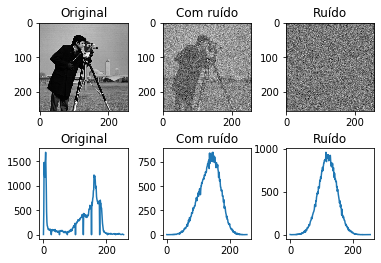

In [65]:
show('images/cameraman.png')

<Figure size 1728x1728 with 0 Axes>

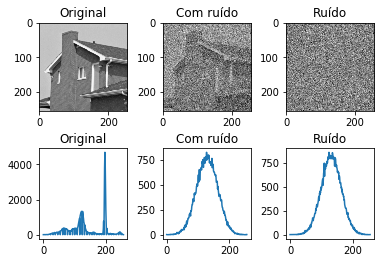

In [66]:
show('images/house.png')

<Figure size 1728x1728 with 0 Axes>

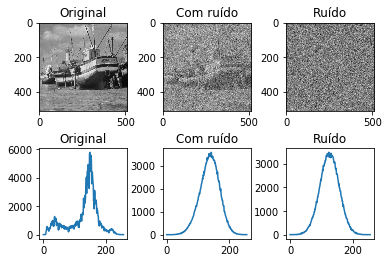

In [67]:
show('images/ship.png')

## 2.2 - Ruído Exponencial

<Figure size 1728x1728 with 0 Axes>

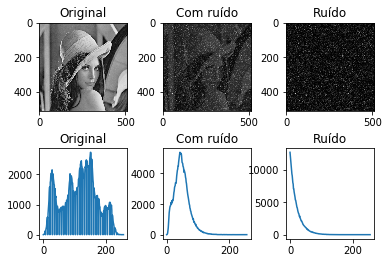

In [68]:
show('images/lena.png', noise='exponential', scale=0.44)

<Figure size 1728x1728 with 0 Axes>

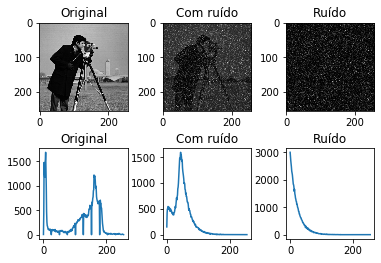

In [69]:
show('images/cameraman.png', noise='exponential', scale=0.66)

<Figure size 1728x1728 with 0 Axes>

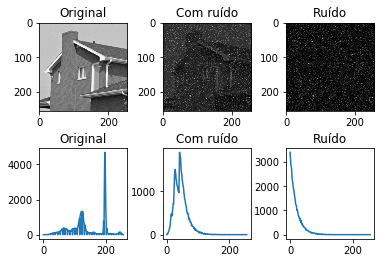

In [70]:
show('images/house.png', noise='exponential', scale=0.55)

<Figure size 1728x1728 with 0 Axes>

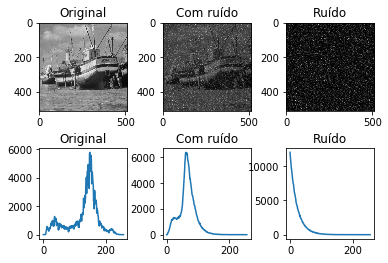

In [71]:
show('images/ship.png', noise='exponential', scale=0.33)

## 2.3 - Ruído Rayleigh

<Figure size 1728x1728 with 0 Axes>

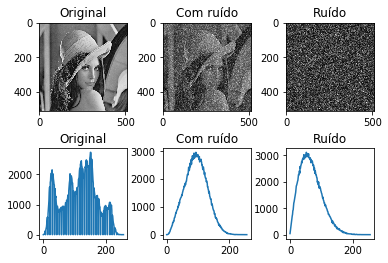

In [83]:
show('images/lena.png', noise='rayleigh', scale=0.44, sigma=128)

<Figure size 1728x1728 with 0 Axes>

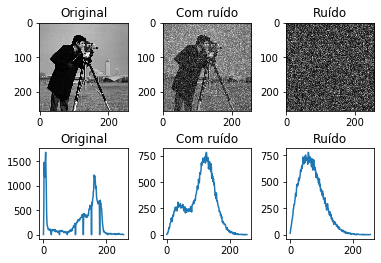

In [86]:
show('images/cameraman.png', noise='rayleigh', scale=0.44)

<Figure size 1728x1728 with 0 Axes>

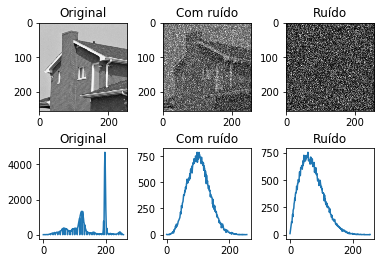

In [87]:
show('images/house.png', noise='rayleigh', scale=0.66)

<Figure size 1728x1728 with 0 Axes>

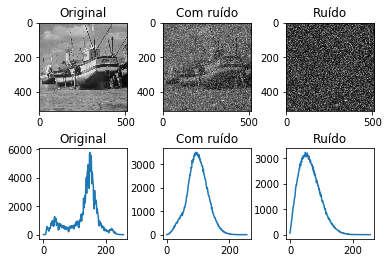

In [88]:
show('images/ship.png', noise='rayleigh', scale=0.66)

## 2.4 - Ruído Gamma

<Figure size 1728x1728 with 0 Axes>

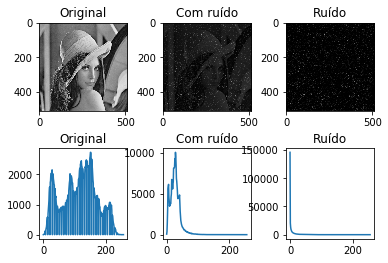

In [93]:
show('images/lena.png', noise='gamma', scale=0.88, sigma=128)

<Figure size 1728x1728 with 0 Axes>

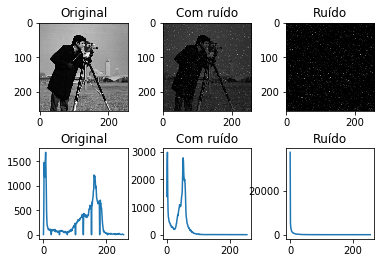

In [94]:
show('images/cameraman.png', noise='gamma', scale=0.88, sigma=64)

<Figure size 1728x1728 with 0 Axes>

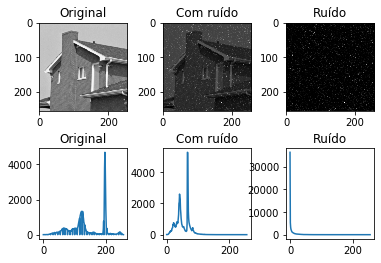

In [97]:
show('images/house.png', noise='gamma', scale=0.88, sigma=64)

<Figure size 1728x1728 with 0 Axes>

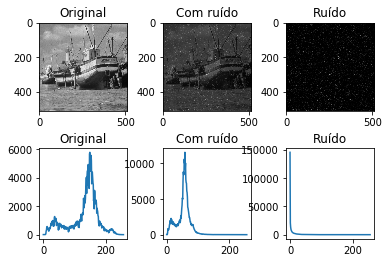

In [96]:
show('images/ship.png', noise='gamma', scale=0.88, sigma=64)

## 2.5 - Conclusão
Podemos perceber a olho nu, que os histogramas da imagem com ruído se parece, após um limiar, com a distribuição do ruído, ou seja, com a distribuição esperada.

Dessa forma, poderíamos inferir observando os histogramas, um determinado ruído para a imagem ruidosa.

# 3 - Shapiro-wilki

O teste de shapiro-wilki é um teste de **normalidade**, ou seja, a hipótese é que a população segue uma distribuição normal.

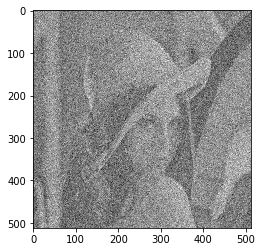

In [99]:
img = read_img('images/lena.png') 
SIGMA = 128

noise = np.random.normal(0, SIGMA/255.0, img.shape)

noisy = img + noise * SIGMA #imagem ruidosa

plt.imshow(noisy, cmap='gray')

Precisamos pegar o histograma da imagem ruidosa e do ruído (que segue a distribuição gaussiana).

Vamos chamar da imagem ruidosa de **observado** e do ruído de **esperado**.

In [113]:
observed, bin_edges = np.histogram(noisy, bins=256, density=False)
expected, bin_edges = np.histogram(noise, bins=256, density=False)

Vamos agora visualizar ambos os histogramas.

Podemos perceber que são muito parecidos!

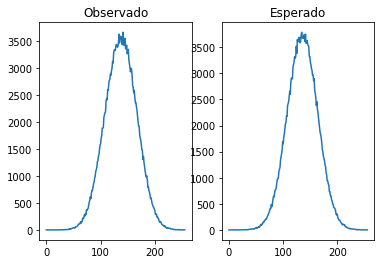

In [118]:
fig, axarr = plt.subplots(1,2)
axarr[0].set_title('Observado')
axarr[0].plot(observed)
axarr[1].set_title('Esperado')
axarr[1].plot(expected)

Vamos realizar agora o teste de shapiro-wilki com a função "is_gaussian", com alpha = 0.05.

In [119]:
is_gaussian(noise.flatten())

Se parece com Gaussiano.


O ruído se parece com gaussiano, faz todo sentido!

In [107]:
is_gaussian(noisy.flatten())

Não é gaussiano.


A imagem ruidosa não é gaussiano.

## 3.1 - Dúvida
**Minha dúvida é**: se olhando a olho nu, podemos perceber que os histogramas são parecidos, ou seja, eu diria que o histograma da imagem observada segue a distribuição gaussiana. Por que o teste de Shapiro-Wilki dá falso?

# 4 - Qui-Quadrado

Sabemos que o Grau de Liberdade é muito importante para o qui-quadrado. Em nosso caso, será a quantidade de intensidade de pixels -1, ou seja, **255**.

In [122]:
GRAU_DE_LIBERDADE = len(observed) - 1
GRAU_DE_LIBERDADE

255

In [123]:
c , p = st.chisquare(observed, expected, ddof=GRAU_DE_LIBERDADE)
c,p

/media/darlan/DATA/deeplearning-projects/DnCNNblur_noise_keras/DnCNNblur_noise_keras/venv/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/media/darlan/DATA/deeplearning-projects/DnCNNblur_noise_keras/DnCNNblur_noise_keras/venv/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


(nan, nan)

In [125]:
stats = 0
for i, intensity in enumerate(observed):
    if expected[i] != 0:
        stats += ((intensity - expected[i])**2)/expected[i]

stats

2474.753600142211

Segundo a calculadora de p-valor do site https://www.socscistatistics.com/pvalues/chidistribution.aspx, com DF = 255 e chi-square score = 2474.75 ... o p-valor é < .00001, ou seja, muito pequeno para podermos dizer que a distribuição observada se parece com a esperada.

**Minhas dúvidas são**: novamente, observando os histogramas, podemos inferir que segue uma distribuição conhecida e normal. 

- Por que os testes do qui-quadrado e shapiro-wilki indicam o contrário?
- Não podemos confiar em inferências observando os histogramas?